In [ ]:
# https://www.youtube.com/watch?v=MRGXd8eaWB4&t=366s
# this program uses on-Balance Volume (OBV) to determine when to buy and sell stock

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# load the data
import pandas_datareader
import datetime
import pandas_datareader.data as web

# from google.colab import files
# uploaded = files.upload()
# choose files = AMZN.csv
# df = pd.read_csv('AMZN.csv')
# df = df.set_index(pd.DateTimeIndex(df.Date.values))
# df
start = datetime.datetime(2020, 3, 16)
end = datetime.datetime(2020, 9, 18)
df = web.DataReader('AMZN', 'yahoo', start, end)
df
# 131 rows × 6 columns

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-16,1759.449951,1626.030029,1641.510010,1689.150024,8917300,1689.150024
2020-03-17,1857.780029,1689.239990,1775.469971,1807.839966,10917100,1807.839966
2020-03-18,1841.660034,1745.000000,1750.000000,1830.000000,9645200,1830.000000
2020-03-19,1945.000000,1832.650024,1860.000000,1880.930054,10399900,1880.930054
2020-03-20,1957.000000,1820.729980,1926.310059,1846.089966,9817900,1846.089966
...,...,...,...,...,...,...
2020-09-14,3187.389893,3096.000000,3172.939941,3102.969971,4529600,3102.969971
2020-09-15,3175.020020,3108.919922,3136.159912,3156.129883,4021500,3156.129883
2020-09-16,3187.239990,3074.149902,3179.989990,3078.100098,4512200,3078.100098


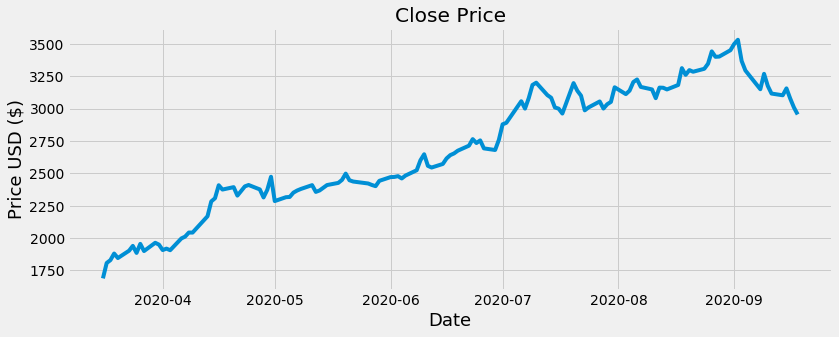

In [3]:
# visualize the stock price
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.Close, label='Close')
plt.title('Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.show()

In [4]:
# calculate the on-balance volume (OBV)
OBV = []
OBV.append(0)
# loop thru the Close column from the 2nd row to the end
for i in range(1, len(df.Close)):
    if df.Close[i] > df.Close[i-1]:
        OBV.append(OBV[-1] + df.Volume[i])
    elif df.Close[i] < df.Close[i-1]:
        OBV.append(OBV[-1] - df.Volume[i])
    else:
        OBV.append(OBV[-1])
# store the OBV in a column
df['OBV'] = OBV
# store the OBV EMA (Exponential Moving Average) in a column
df['OBV_EMA'] = df['OBV'].ewm(span=20).mean()
df

,High,Low,Open,Close,Volume,Adj Close,OBV,OBV_EMA
Date,,,,,,,,
2020-03-16,1759.449951,1626.030029,1641.510010,1689.150024,8917300,1689.150024,0,0.000000e+00
2020-03-17,1857.780029,1689.239990,1775.469971,1807.839966,10917100,1807.839966,10917100,5.731478e+06
2020-03-18,1841.660034,1745.000000,1750.000000,1830.000000,9645200,1830.000000,20562300,1.117727e+07
2020-03-19,1945.000000,1832.650024,1860.000000,1880.930054,10399900,1880.930054,30962200,1.688887e+07
2020-03-20,1957.000000,1820.729980,1926.310059,1846.089966,9817900,1846.089966,21144300,1.791822e+07
...,...,...,...,...,...,...,...,...
2020-09-14,3187.389893,3096.000000,3172.939941,3102.969971,4529600,3102.969971,130605600,1.435398e+08
2020-09-15,3175.020020,3108.919922,3136.159912,3156.129883,4021500,3156.129883,134627100,1.426910e+08
2020-09-16,3187.239990,3074.149902,3179.989990,3078.100098,4512200,3078.100098,130114900,1.414933e+08


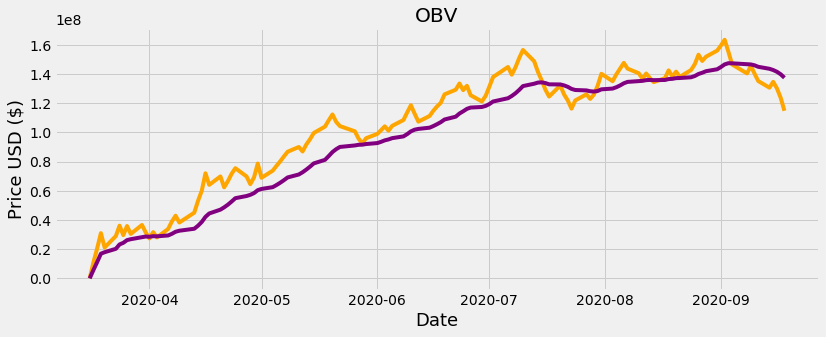

In [5]:
# create and plot the graph
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.OBV, label='OBV', color='orange')
plt.plot(df.OBV_EMA, label='OBV_EMA', color='purple')
plt.title('OBV / OBV-EMA Chart ')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.show()

In [14]:
# create a function to signal when to buy and sell the stock
def trade(Close, OBV, OBV_EMA):
    buys = []
    sells = []
    flag = -1
    # loop thru the dataset
    for i in range(0, len(Close)):
        # if OBV rises above OBV-EMA then buy
        if OBV[i] > OBV_EMA[i] and flag != 1:
            buys.append(Close[i])
            sells.append(np.nan)
            flag = 1
        # if OBV goes below OBV-EMA then sell
        elif OBV[i] < OBV_EMA[i] and flag != 0:
            buys.append(np.nan)
            sells.append(Close[i])
            flag = 0
        # else do nothing
        else:
            buys.append(np.nan)
            sells.append(np.nan)
    return (buys, sells)

In [15]:
trades = trade(df.Close, df.OBV, df.OBV_EMA)
df['Buy'] = trades[0]
df['Sell'] = trades[1]
df

,High,Low,Open,Close,Volume,Adj Close,OBV,OBV_EMA,Buy,Sell
Date,,,,,,,,,,
2020-03-16,1759.449951,1626.030029,1641.510010,1689.150024,8917300,1689.150024,0,0.000000e+00,NaN,NaN
2020-03-17,1857.780029,1689.239990,1775.469971,1807.839966,10917100,1807.839966,10917100,5.731478e+06,1807.839966,NaN
2020-03-18,1841.660034,1745.000000,1750.000000,1830.000000,9645200,1830.000000,20562300,1.117727e+07,NaN,NaN
2020-03-19,1945.000000,1832.650024,1860.000000,1880.930054,10399900,1880.930054,30962200,1.688887e+07,NaN,NaN
2020-03-20,1957.000000,1820.729980,1926.310059,1846.089966,9817900,1846.089966,21144300,1.791822e+07,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-09-14,3187.389893,3096.000000,3172.939941,3102.969971,4529600,3102.969971,130605600,1.435398e+08,NaN,NaN
2020-09-15,3175.020020,3108.919922,3136.159912,3156.129883,4021500,3156.129883,134627100,1.426910e+08,NaN,NaN
2020-09-16,3187.239990,3074.149902,3179.989990,3078.100098,4512200,3078.100098,130114900,1.414933e+08,NaN,NaN


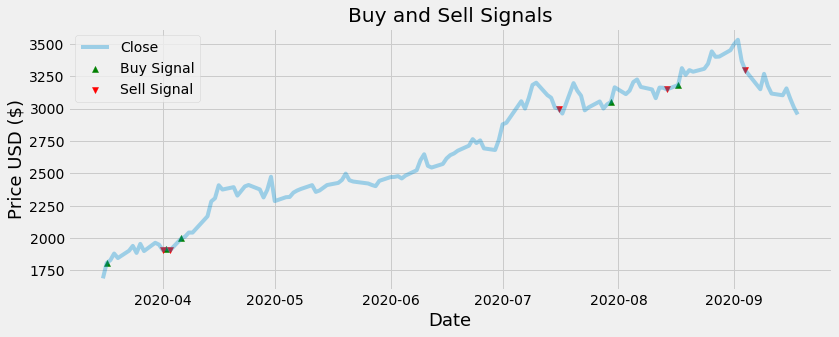

In [16]:
# plot the buy and sell chart
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.Close, label='Close', alpha=0.35)
plt.scatter(df.index, df.Buy, label='Buy Signal', marker='^', alpha=1, color='green')
plt.scatter(df.index, df.Sell, label='Sell Signal', marker='v', alpha=1, color='red')
plt.title('Amazon Buy and Sell Signals')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.legend(loc='upper left')
plt.show()